In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [62]:
max_length0 = '50mlength'
fold = '*'
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*fold{}.csv'.format(fold)

In [63]:
def read_reports(path, kernels, max_length):
    dfs = []
    layer_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if kernels in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            layer_substring_location = filename.find('cnn')
            layer_number = filename[layer_substring_location - 2:layer_substring_location]
            if not layer_number.isnumeric:
                layer_number = layer_number[1:len(kernel_number)]
            lsize = int(layer_number)
            layer_sizes.append(lsize)
    for k in range(len(layer_sizes)):
        if layer_sizes[k] < 0:
            layer_sizes[k] = -layer_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(layer_sizes, accuracy_values), key=lambda x: x[0])
    layer_sizes, accuracy_values = zip(*sorted_data)
    print(layer_sizes, accuracy_values)
    return layer_sizes, accuracy_values

In [64]:
def cal_average(layer_sizes, accuracy_values):
    identical = 1
    new_layer_sizes = [layer_sizes[0]]
    new_accuracy_values = [accuracy_values[0]]
    current_layer = layer_sizes[0]
    current_idx = 0
    current_layer_count = 1
    for i in range(1, len(layer_sizes)):
        next_layer = layer_sizes[i]
        if next_layer != current_layer:
            identical = max(identical, current_layer_count)
            current_layer = next_layer
            current_layer_count = 1
            current_idx += 1
            new_layer_sizes.append(next_layer)
            new_accuracy_values.append(accuracy_values[i])
        else:
            past_acc_sum = new_accuracy_values[current_idx] * current_layer_count
            current_layer_count += 1
            new_accuracy_values[current_idx] = (past_acc_sum + accuracy_values[i]) / current_layer_count
    print(len(new_layer_sizes), len(new_accuracy_values))
    print(new_layer_sizes, new_accuracy_values)
    print(identical)
    return new_layer_sizes, new_accuracy_values

In [65]:
kernel0 = '-3kernel'

layer_sizes0, accuracy_values0 = read_reports(path, kernel0, max_length0)
layer_sizes0, accuracy_values0 = cal_average(layer_sizes0, accuracy_values0)

(2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4) (0.968224913169999, 0.9694452266967052, 0.965972026659157, 0.9685534591194968, 0.9678494320848589, 0.967098469914578, 0.9648925185393786, 0.9679433023561438, 0.9683657185769268, 0.9672862104571482, 0.9672862104571482, 0.9690697456115648, 0.9642823617760256, 0.9634844644701024, 0.9701023185957008)
3 3
[2, 3, 4] [0.9680090115460434, 0.9671172439688351, 0.9668450201821083]
5


In [66]:
kernel1 = '-4kernel'

layer_sizes1, accuracy_values1 = read_reports(path, kernel1, max_length0)
layer_sizes1, accuracy_values1 = cal_average(layer_sizes1, accuracy_values1)

(2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4) (0.9650802590819488, 0.9679902374917864, 0.9661128320660848, 0.9680841077630714, 0.9657842861165868, 0.9655496104383742, 0.968835069933352, 0.9690228104759224, 0.9679902374917864, 0.964235426640383, 0.9617478644513284, 0.9685065239838544, 0.9664413780155824, 0.9686003942551394, 0.9605275509246222)
3 3
[2, 3, 4] [0.9666103445038956, 0.9671266309959636, 0.9651647423261054]
5


In [67]:
kernel2 = '-5kernel'

layer_sizes2, accuracy_values2 = read_reports(path, kernel2, max_length0)
layer_sizes2, accuracy_values2 = cal_average(layer_sizes2, accuracy_values2)

(2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4) (0.9672392753215056, 0.968647329390782, 0.9644231671829532, 0.9675678212710036, 0.9668168591007228, 0.9671923401858632, 0.9690228104759224, 0.9657373509809444, 0.9704308645451986, 0.9653149347601616, 0.9641884915047404, 0.9673331455927908, 0.9649394536750212, 0.9646109077255234, 0.9656904158453018)
3 3
[2, 3, 4] [0.9669388904533933, 0.967539660189618, 0.9653524828686756]
5


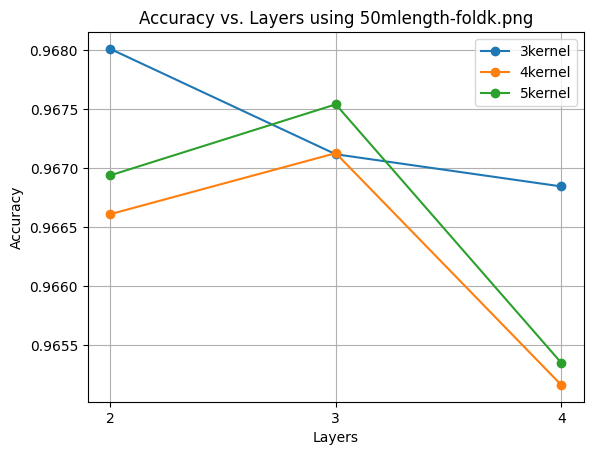

In [68]:
plt.plot(layer_sizes0, accuracy_values0, '-o', label=kernel0[1:])
plt.plot(layer_sizes1, accuracy_values1, '-o', label=kernel1[1:])
plt.plot(layer_sizes2, accuracy_values2, '-o', label=kernel2[1:])
plt.xticks([i for i in range(2, layer_sizes0[len(layer_sizes0)-1]+1, 2 if layer_sizes0[len(layer_sizes0)-1]>=20 else 1)])
plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Layers using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Layers using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.show()